In [609]:
#import library to be used
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [610]:
# import the data into variable 'data'
data = pd.read_csv("risk_factors_cervical_cancer.csv")
data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


# Cleaning data

In [611]:
#try to check the null but cannot be identified becuase null value reperesented in '?'
data.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [612]:
# Turn "?" symbol into NaN to make it readable for python
missing_value = ["?", np.nan]
data = pd.read_csv("risk_factors_cervical_cancer.csv", na_values=missing_value)

data.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [613]:
#check if the data has duplicated row
data.duplicated().sum()

23

In [614]:
#merged four target variables into one
column_names = ['Hinselmann', 'Schiller', 'Citology', 'Biopsy']
data['Diagnosed']= data[column_names].sum(axis=1)
#drop the merged columns
col = ['Hinselmann', 'Schiller', 'Citology', 'Biopsy']
data = data.drop(columns=col)
data.head(20)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Diagnosed
0,18,4.0,15.0,1.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0.0,0,NaN,NaN,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0.0,0,NaN,NaN,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0.0,0,NaN,NaN,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.0,1.0,3.00,0.0,...,0.0,0.0,0,NaN,NaN,1,0,1,0,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.0,1.0,15.00,0.0,...,0.0,0.0,0,NaN,NaN,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0.0,0,NaN,NaN,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.4,0.0,0.00,1.0,...,0.0,0.0,0,NaN,NaN,0,0,0,0,3
7,26,1.0,26.0,3.0,0.0,0.000000,0.0,1.0,2.00,1.0,...,0.0,0.0,0,NaN,NaN,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0.0,0,NaN,NaN,1,0,1,1,0
9,44,3.0,15.0,NaN,1.0,1.266973,2.8,0.0,0.00,NaN,...,0.0,0.0,0,NaN,NaN,0,0,0,0,0


In [615]:
#fill the null value with data's mean
datamean = data.fillna(data.mean())
#round the float value into 2 decimal values
datamean = datamean.round(decimals = 2)
datamean

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Diagnosed
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,6.14,5.82,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,6.14,5.82,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,6.14,5.82,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0.0,0,6.14,5.82,1,0,1,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0.0,0,6.14,5.82,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,6.14,5.82,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0.0,0,6.14,5.82,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0,6.14,5.82,0,0,0,0,1
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0,6.14,5.82,0,0,0,0,0


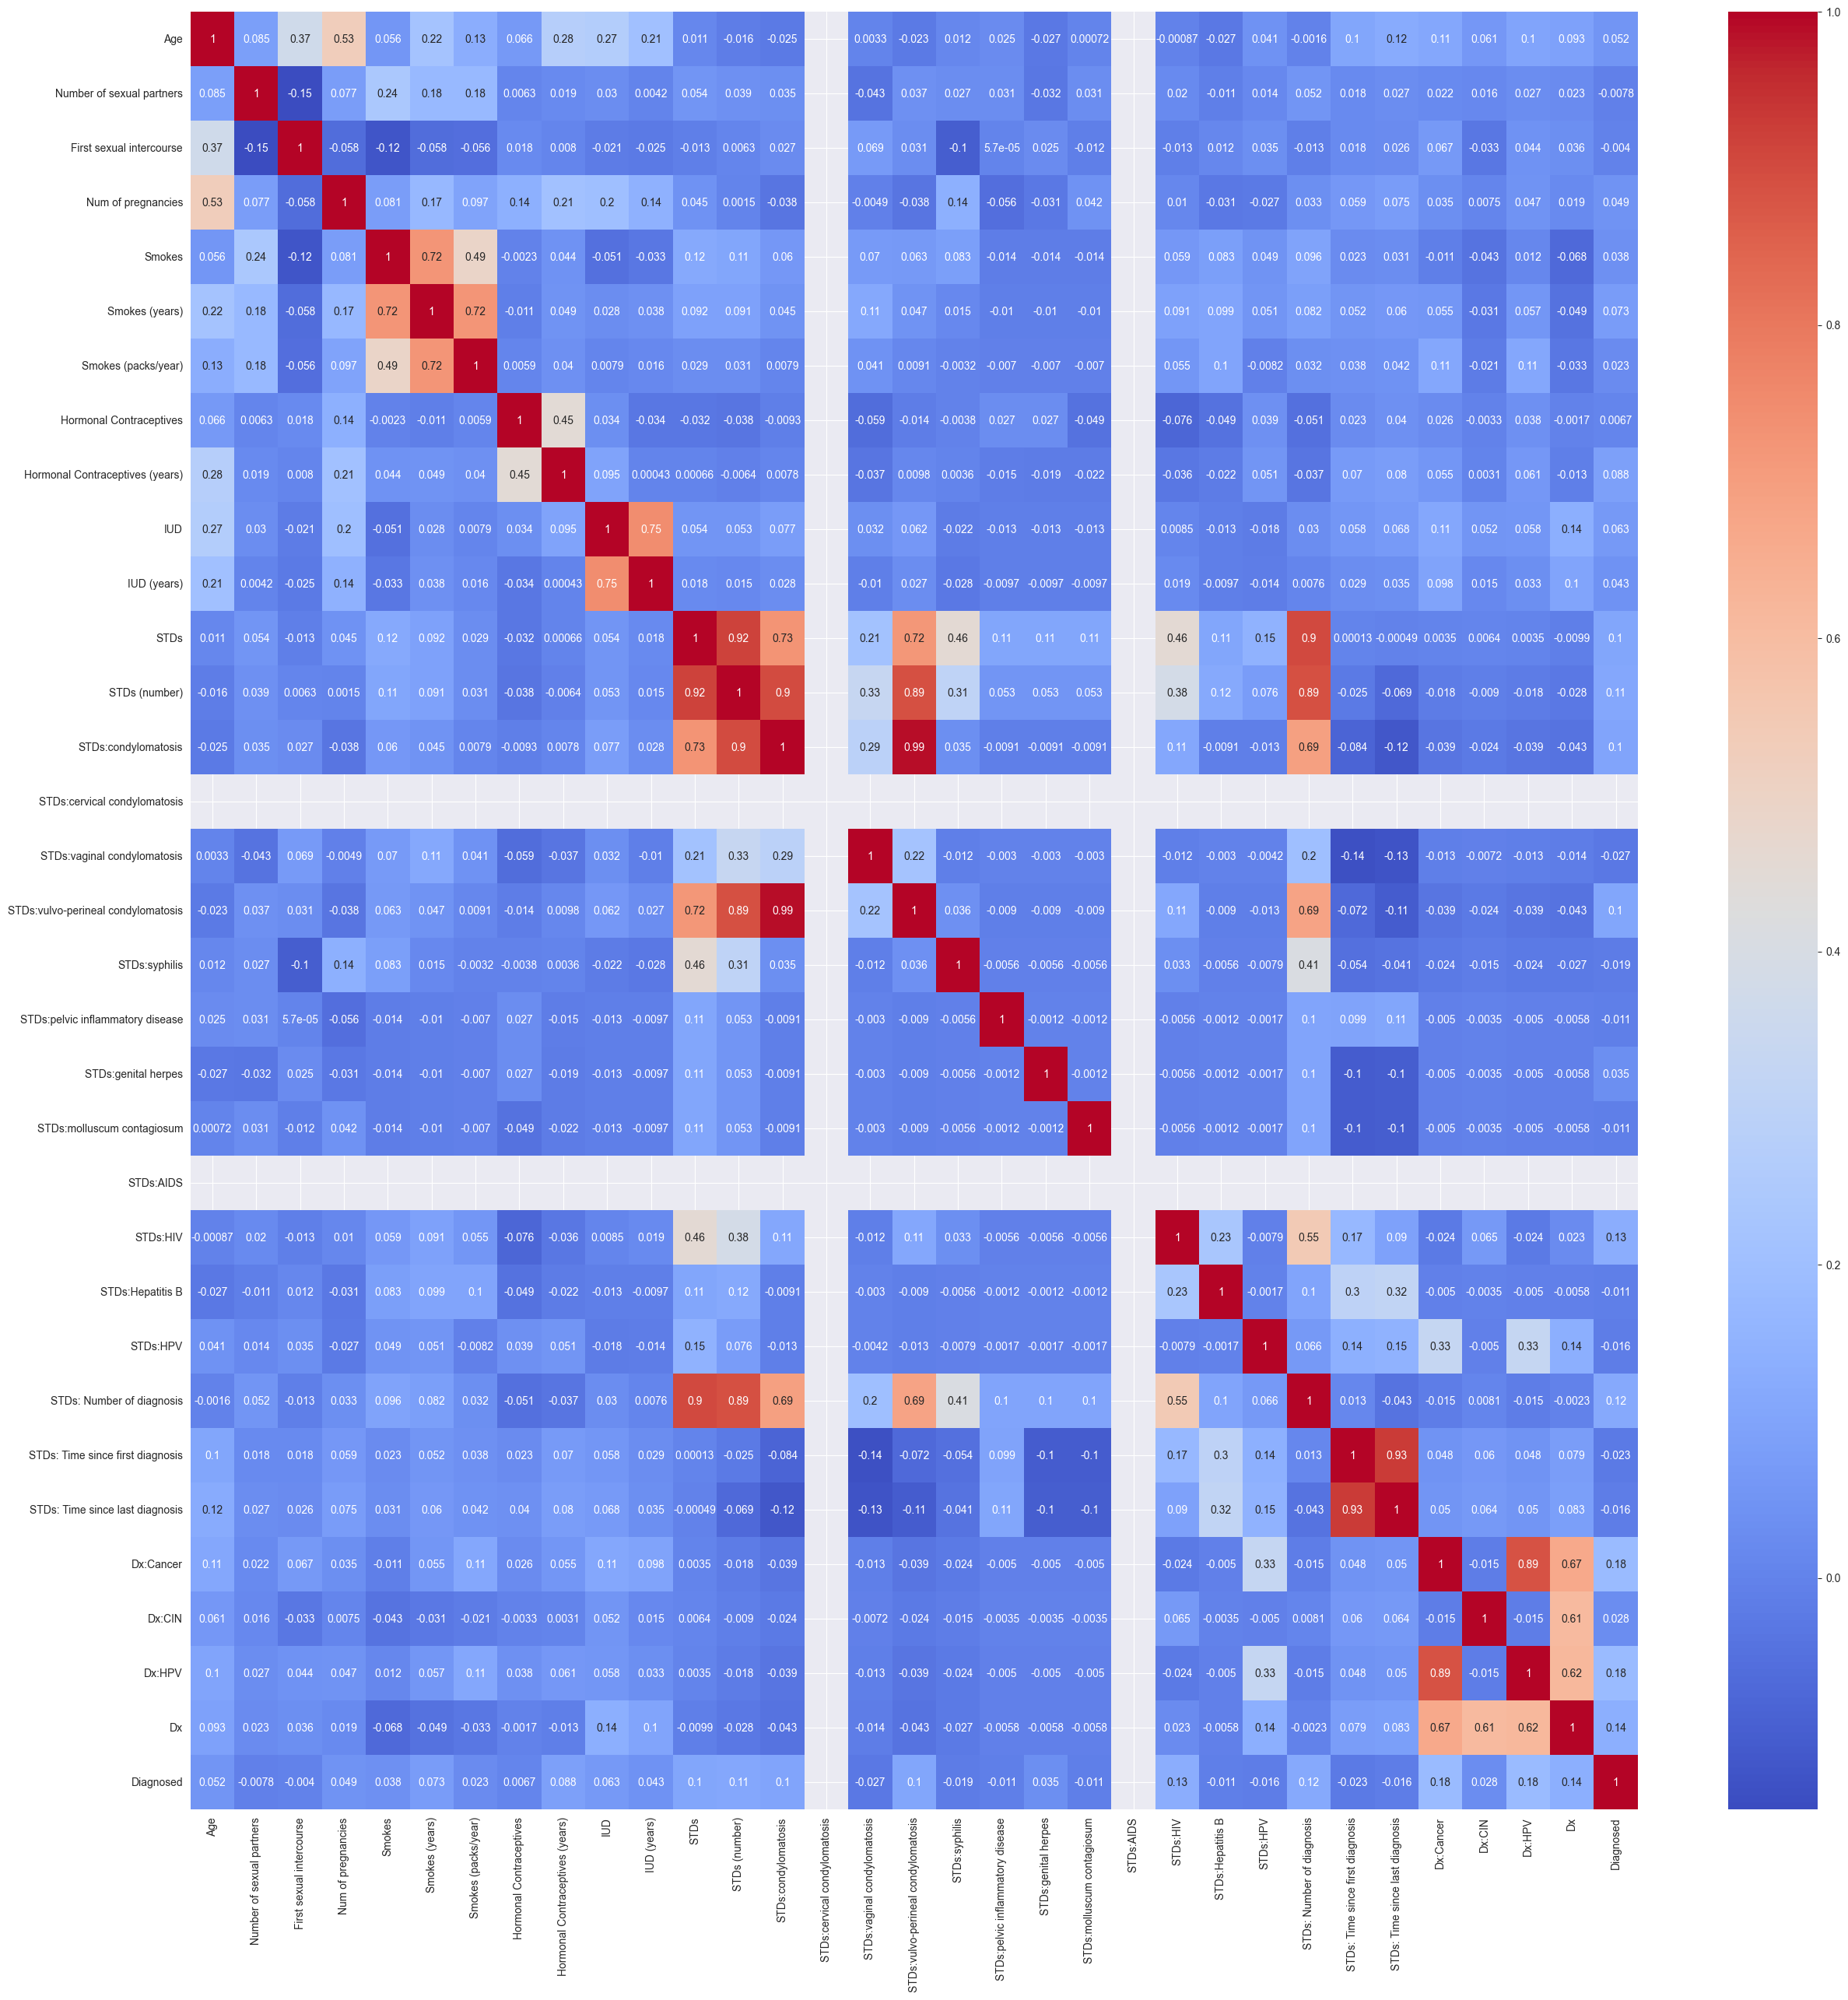

In [616]:
plt.figure(figsize = (30, 30))
sns.heatmap(datamean.corr(), annot = True, cmap="coolwarm")
plt.show()

In [617]:
datamean

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Diagnosed
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,6.14,5.82,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,6.14,5.82,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,6.14,5.82,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0.0,0,6.14,5.82,1,0,1,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0.0,0,6.14,5.82,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,6.14,5.82,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0.0,0,6.14,5.82,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0,6.14,5.82,0,0,0,0,1
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0,6.14,5.82,0,0,0,0,0


In [618]:
import pandas as pd

# Assuming you have a DataFrame named df with input features and target value
target_column = 'Diagnosed'  # Specify the name of the target column
correlation_threshold = 0.05  # Specify the correlation threshold
print(datamean.corr()[target_column])
# Calculate the correlation between the target and input features, excluding the target column
correlation = datamean.corr()[target_column]

# Identify the columns with correlation great than the threshold and not equal to 1
columns_to_drop = correlation[(correlation.abs() > correlation_threshold) & (correlation != 1)].index

# Drop the identified columns from the DataFrame
datamean = datamean.drop(columns_to_drop, axis=1)

print(datamean.head)

Age                                   0.051521
Number of sexual partners            -0.007830
First sexual intercourse             -0.003961
Num of pregnancies                    0.049083
Smokes                                0.037997
Smokes (years)                        0.073147
Smokes (packs/year)                   0.023430
Hormonal Contraceptives               0.006723
Hormonal Contraceptives (years)       0.088336
IUD                                   0.063019
IUD (years)                           0.043095
STDs                                  0.103515
STDs (number)                         0.111321
STDs:condylomatosis                   0.101349
STDs:cervical condylomatosis               NaN
STDs:vaginal condylomatosis          -0.026871
STDs:vulvo-perineal condylomatosis    0.104201
STDs:syphilis                        -0.019255
STDs:pelvic inflammatory disease     -0.011170
STDs:genital herpes                   0.034906
STDs:molluscum contagiosum           -0.011170
STDs:AIDS    

In [619]:
datamean.shape

(858, 20)

In [620]:
datamean.isnull().sum()

Number of sexual partners           0
First sexual intercourse            0
Num of pregnancies                  0
Smokes                              0
Smokes (packs/year)                 0
Hormonal Contraceptives             0
IUD (years)                         0
STDs:cervical condylomatosis        0
STDs:vaginal condylomatosis         0
STDs:syphilis                       0
STDs:pelvic inflammatory disease    0
STDs:genital herpes                 0
STDs:molluscum contagiosum          0
STDs:AIDS                           0
STDs:Hepatitis B                    0
STDs:HPV                            0
STDs: Time since first diagnosis    0
STDs: Time since last diagnosis     0
Dx:CIN                              0
Diagnosed                           0
dtype: int64

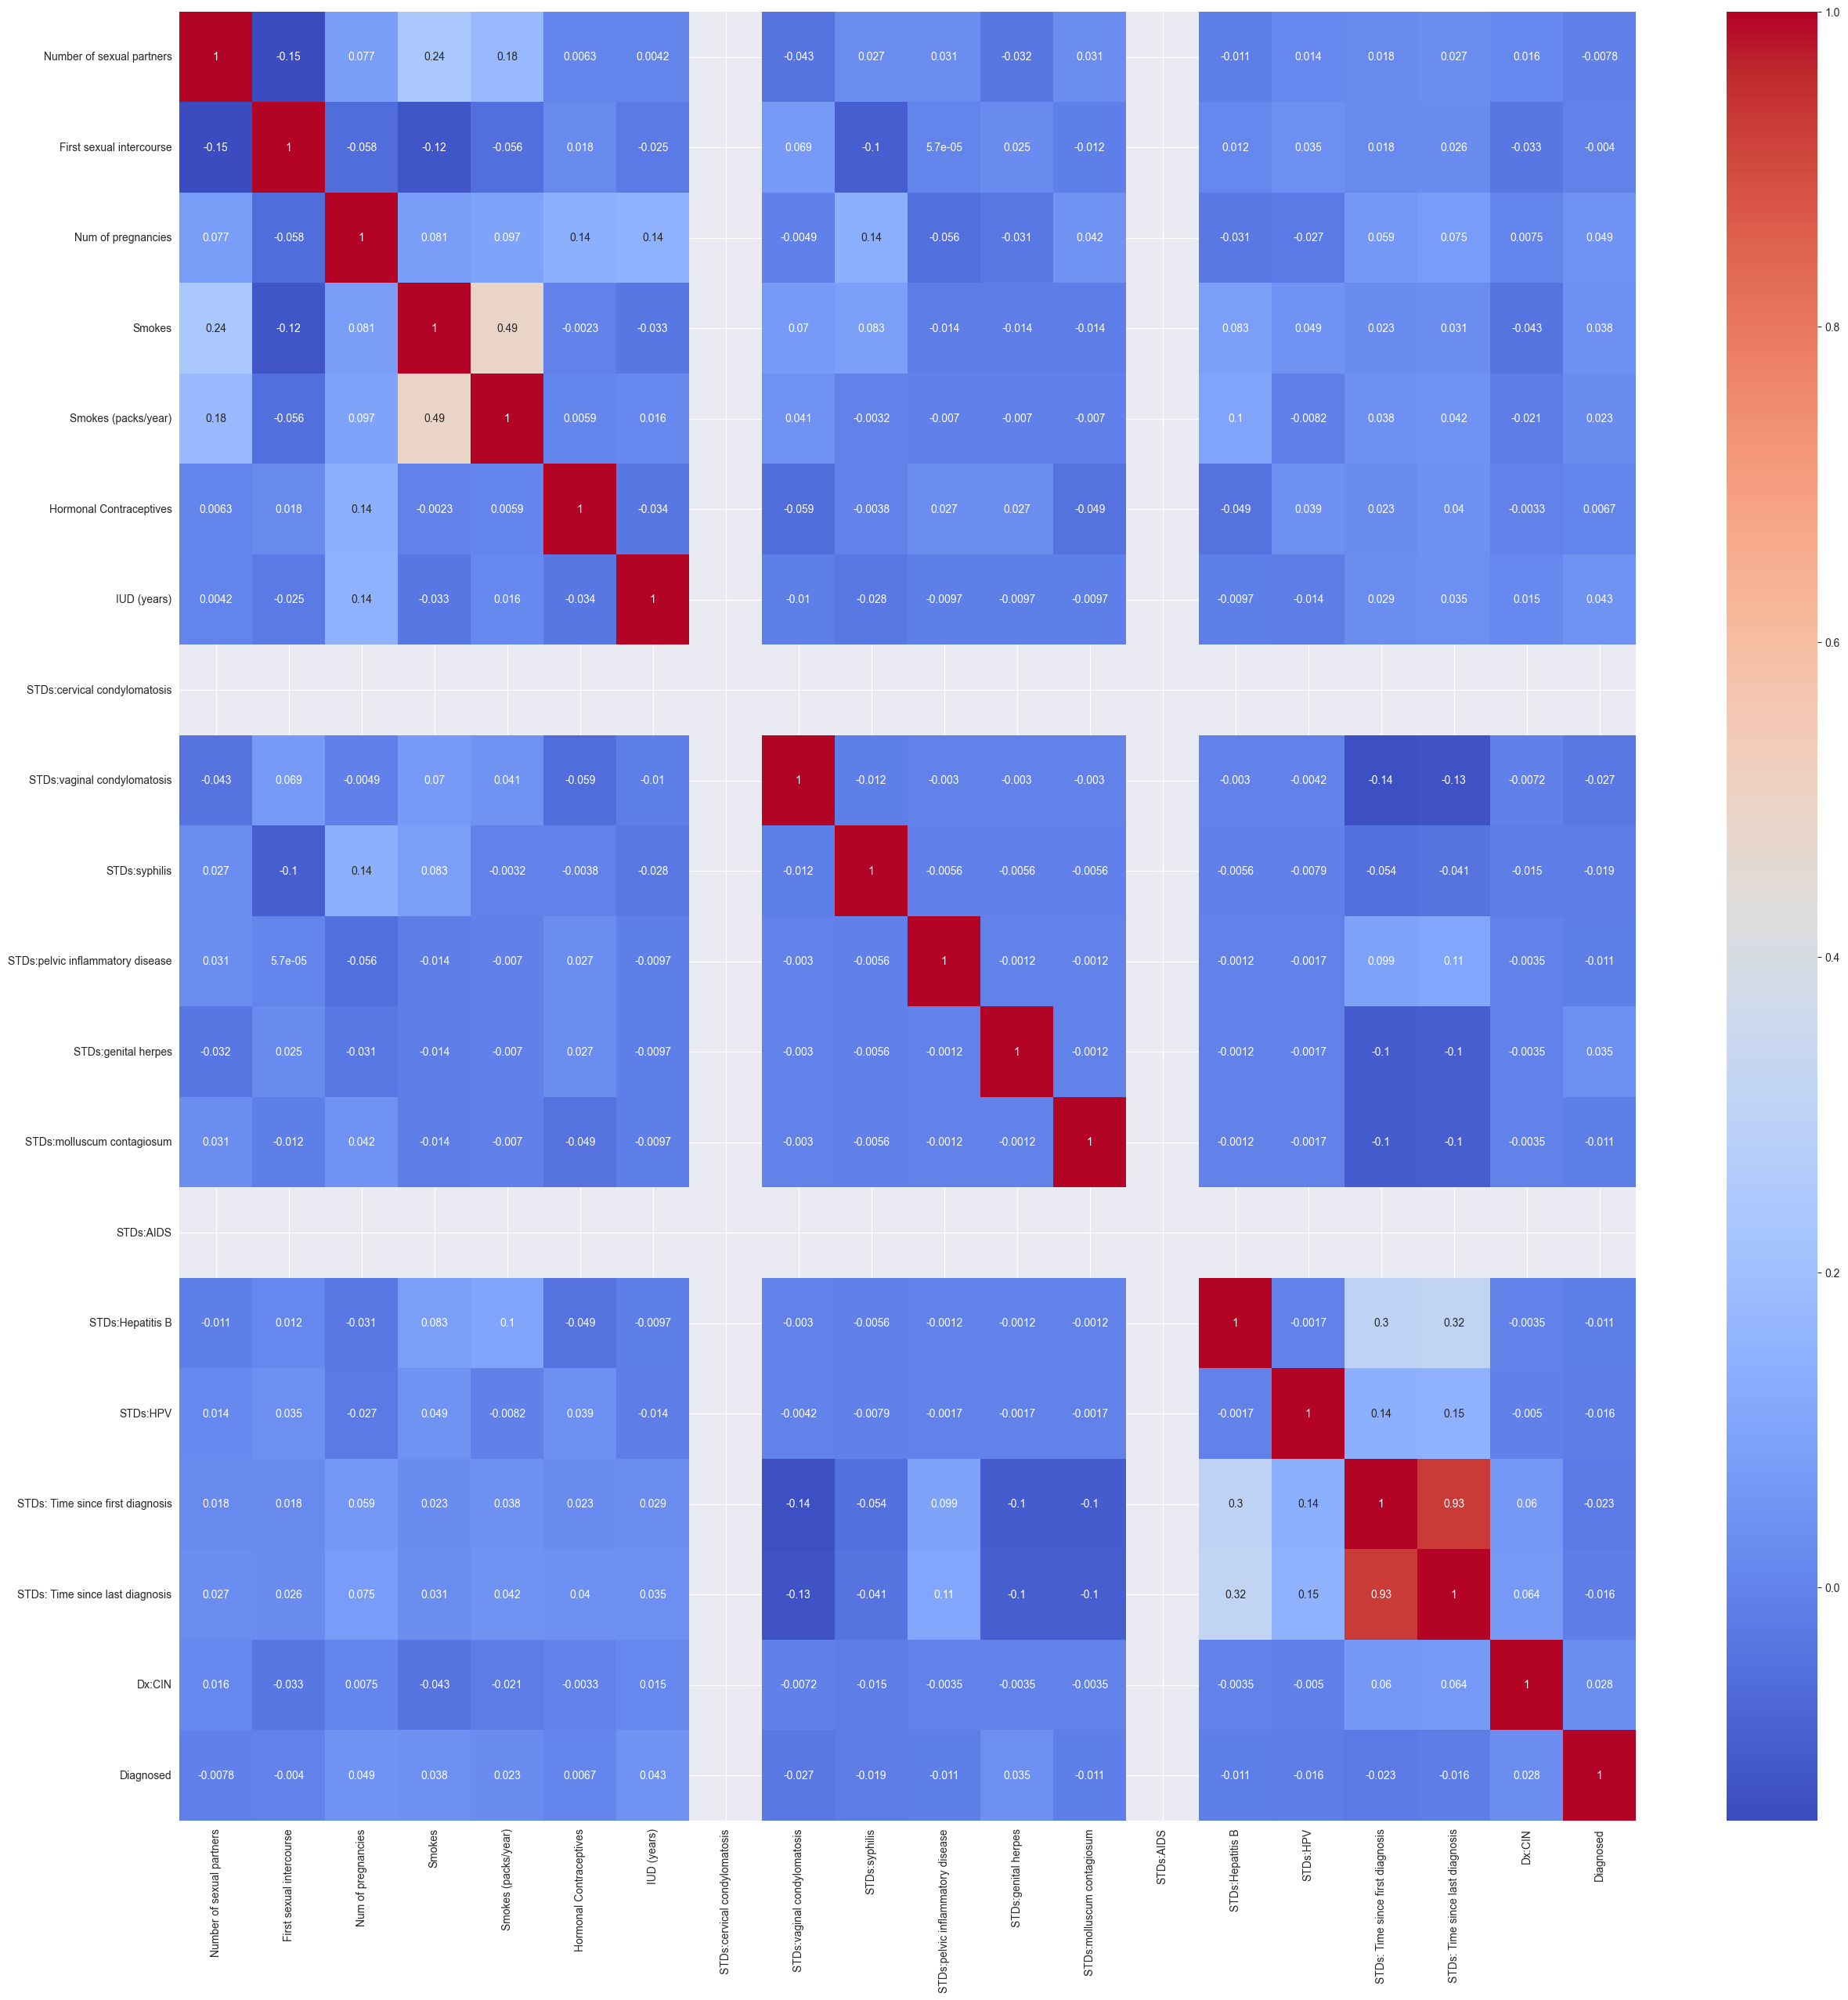

In [621]:
plt.figure(figsize = (30, 30))
sns.heatmap(datamean.corr(), annot = True, cmap="coolwarm")
plt.show()

In [622]:
#based on the heatmap
#drop the unecessary columns
col = ['Smokes', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis','STDs:AIDS','STDs:cervical condylomatosis']
datamean.drop(columns=col, inplace=True)
datamean.shape

(858, 15)

In [623]:
#DATA ANALYSIS
y_variable=['Diagnosed'] #Create columns for y variables
#Create columns for non-boolean x variables
X_col_new = ['Number of sexual partners','First sexual intercourse','Num of pregnancies','IUD (years)'] 
x_var = datamean[X_col_new] #Create new dataset for non-boolean x variables
x_var

,Number of sexual partners,First sexual intercourse,Num of pregnancies,IUD (years)
0,4.0,15.0,1.0,0.0
1,1.0,14.0,1.0,0.0
2,1.0,17.0,1.0,0.0
3,5.0,16.0,4.0,0.0
4,3.0,21.0,4.0,0.0
...,...,...,...,...
853,3.0,18.0,0.0,0.0
854,2.0,19.0,1.0,0.0
855,2.0,17.0,0.0,0.0
856,2.0,24.0,2.0,0.0


In [624]:
#Method to look for outliers using z-score

def detect_outliers_zscore(x_data, threshold):
    """
    Detect outliers in the given x-variables using z-scores.   
    Args:
        x_data (array-like): The input x-variables data.
        threshold (float): The z-score threshold for determining outliers.
        Data points with z-scores greater than the threshold are considered outliers.
    Returns:
        array: Boolean array indicating whether each x-data point is an outlier (True) or not (False).
    """
    x_mean = np.mean(x_data, axis=0)
    x_std = np.std(x_data, axis=0)
    z_scores = np.abs((x_data - x_mean) / x_std)
    outliers = z_scores > threshold
    return outliers

In [625]:
outliers = detect_outliers_zscore(x_var, threshold=3) #Look for outliers in x_var (threshold value can be modified)
outliers

,Number of sexual partners,First sexual intercourse,Num of pregnancies,IUD (years)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
853,False,False,False,False
854,False,False,False,False
855,False,False,False,False
856,False,False,False,False


In [626]:
clean_data = datamean[~outliers.any(axis=1)] #Remove rows containing outliers in datamean
clean_data

,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (packs/year),Hormonal Contraceptives,IUD (years),STDs:vaginal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:Hepatitis B,STDs:HPV,Dx:CIN,Diagnosed
0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,5.0,16.0,4.0,37.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,3.0,21.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
854,2.0,19.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
855,2.0,17.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
856,2.0,24.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


Linear Regression model by Azim

In [627]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = clean_data.drop(columns = 'Diagnosed')
y = clean_data['Diagnosed']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

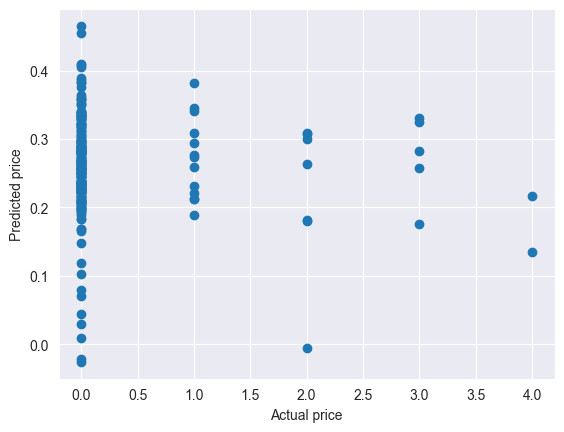

In [628]:
import matplotlib.pyplot as plt

y_pred_test = lr.predict(x_test)

plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.show()

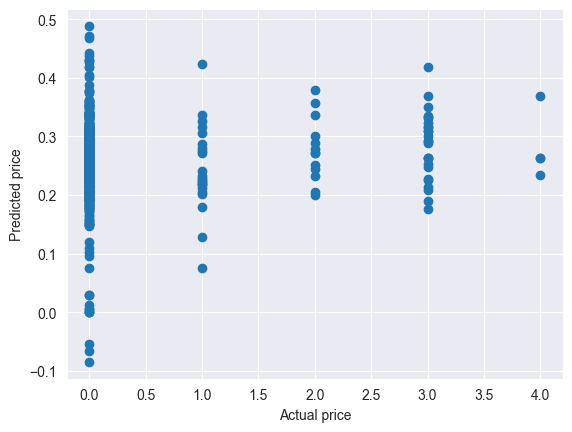

In [629]:
y_pred_train = lr.predict(x_train)

plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.show()

In [630]:
from sklearn.metrics import r2_score

r2score = r2_score(y_test, y_pred_test)
r2score

-0.03338376071991611

In [631]:
r2score = r2_score(y_train, y_pred_train)
r2score

0.007883853777982397

In [632]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred_test)

0.4667412282723384

In [633]:
mean_squared_error(y_train, y_pred_train)

0.6028436778870974

In [634]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

In [635]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 791 entries, 0 to 857
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Number of sexual partners         791 non-null    float64
 1   First sexual intercourse          791 non-null    float64
 2   Num of pregnancies                791 non-null    float64
 3   Smokes (packs/year)               791 non-null    float64
 4   Hormonal Contraceptives           791 non-null    float64
 5   IUD (years)                       791 non-null    float64
 6   STDs:vaginal condylomatosis       791 non-null    float64
 7   STDs:syphilis                     791 non-null    float64
 8   STDs:pelvic inflammatory disease  791 non-null    float64
 9   STDs:genital herpes               791 non-null    float64
 10  STDs:molluscum contagiosum        791 non-null    float64
 11  STDs:Hepatitis B                  791 non-null    float64
 12  STDs:HPV     

In [636]:
# Prepare the data
#features = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)',
 #           'Smokes (packs/year)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs:condylomatosis','STDs:cervical condylomatosis','STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:pelvic inflammatory disease','STDs:genital herpes','STDs:molluscum contagiosum','STDs:AIDS','STDs:HIV','STDs:Hepatitis B','STDs:HPV','Dx:Cancer','Dx:CIN','Dx:HPV',]
#features
features = clean_data.columns
features

Index(['Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (packs/year)', 'Hormonal Contraceptives',
       'IUD (years)', 'STDs:vaginal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:Hepatitis B', 'STDs:HPV', 'Dx:CIN',
       'Diagnosed'],
      dtype='object')

In [637]:
target = 'Diagnosed'
target

'Diagnosed'

In [638]:
# Separate the features and target variable
X1 = clean_data.drop(columns=target)
y1 = clean_data[target]
X1

,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (packs/year),Hormonal Contraceptives,IUD (years),STDs:vaginal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:Hepatitis B,STDs:HPV,Dx:CIN
0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,5.0,16.0,4.0,37.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,3.0,21.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
854,2.0,19.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
855,2.0,17.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
856,2.0,24.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [639]:
# Perform preprocessing: scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
scaler = MinMaxScaler()
X_preprocessed = scaler.fit_transform(X1)


In [640]:
# Split the preprocessed dataset into training, validation, and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(X_preprocessed,y,test_size=0.2, random_state=42)
val_data, test_data, val_labels, test_labels = train_test_split(test_data, test_labels,test_size=0.5, random_state=42)

In [641]:
# Print the shapes of the resulting datasets
print('Train Data:', train_data.shape)
print('Train Labels:', train_labels.shape)
print('Validation Data:', val_data.shape)
print('Validation Labels:', val_labels.shape)
print('Test Data:', test_data.shape)
print('Test Labels:', test_labels.shape)

Train Data: (632, 14)
Train Labels: (632,)
Validation Data: (79, 14)
Validation Labels: (79,)
Test Data: (80, 14)
Test Labels: (80,)


In [642]:
import tensorflow as tf
from tensorflow import keras


# Neural Network

In [643]:
# Define the model architecture
#Basic feedforwars neural network
model_2= keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(14,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [644]:
# Compile the model
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [645]:
# Train the model
history = model_2.fit(train_data, train_labels, epochs=10, validation_data=(val_data, val_labels))


Epoch 1/10
20/20 [==============================] - 2s 18ms/step - loss: 0.6734 - accuracy: 0.7579 - val_loss: 0.6407 - val_accuracy: 0.8481
Epoch 2/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6193 - accuracy: 0.8924 - val_loss: 0.6001 - val_accuracy: 0.8481
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 0.5750 - accuracy: 0.8924 - val_loss: 0.5620 - val_accuracy: 0.8481
Epoch 4/10
20/20 [==============================] - 0s 5ms/step - loss: 0.5517 - accuracy: 0.8924 - val_loss: 0.5546 - val_accuracy: 0.8481
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.5469 - accuracy: 0.8924 - val_loss: 0.5539 - val_accuracy: 0.8481
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.5444 - accuracy: 0.8924 - val_loss: 0.5529 - val_accuracy: 0.8481
Epoch 7/10
20/20 [==============================] - 0s 4ms/step - loss: 0.5435 - accuracy: 0.8924 - val_loss: 0.5529 - val_accuracy: 0.8481
Epoch 8/10
20/20 [=

In [646]:
# Evaluate the model
loss, accuracy = model_2.evaluate(train_data, train_labels)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

20/20 [==============================] - 0s 2ms/step - loss: 0.5384 - accuracy: 0.8924
Test Loss: 0.5383726954460144
Test Accuracy: 0.892405092716217


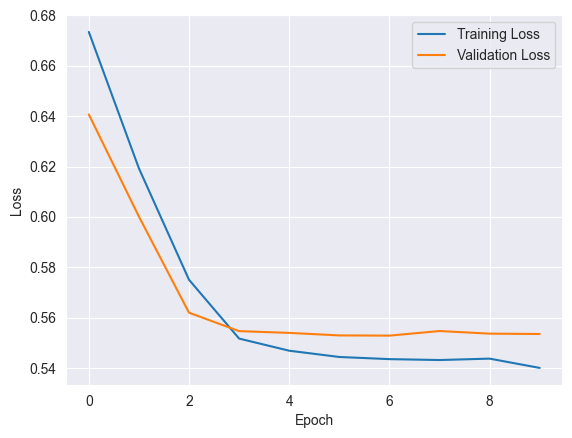

In [647]:
import matplotlib.pyplot as plt

# Plot the training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# FNN

In [648]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Improve data scale before training
scaler = StandardScaler()
scaler.fit(x_train)
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Build model
model_3 = Sequential()

# 1st hidden layer
model_3.add(Dense(16, activation='relu', input_shape = (x_train.shape[1],)))

# 2nd hidden layer
model_3.add(Dense(12, activation='relu'))

# output layer
model_3.add(Dense(1, activation='sigmoid'))

# Compile the model
model_3.compile(loss = 'binary_crossentropy',optimizer='adam', metrics=['accuracy'])

# Model evaluate
model_3.evaluate(X_test_scaled,y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.5714


[0.6970424056053162, 0.5714285969734192]

In [649]:
# Train the model
train_model_3 = model_3.fit(X_train_scaled,y_train,epochs = 30, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/30
18/18 [==============================] - 1s 10ms/step - loss: 0.6722 - accuracy: 0.7486 - val_loss: 0.6580 - val_accuracy: 0.8613
Epoch 2/30
18/18 [==============================] - 0s 4ms/step - loss: 0.6396 - accuracy: 0.8680 - val_loss: 0.6344 - val_accuracy: 0.8824
Epoch 3/30
18/18 [==============================] - 0s 4ms/step - loss: 0.6178 - accuracy: 0.8807 - val_loss: 0.6216 - val_accuracy: 0.8866
Epoch 4/30
18/18 [==============================] - 0s 4ms/step - loss: 0.6044 - accuracy: 0.8807 - val_loss: 0.6097 - val_accuracy: 0.8866
Epoch 5/30
18/18 [==============================] - 0s 4ms/step - loss: 0.5956 - accuracy: 0.8807 - val_loss: 0.6009 - val_accuracy: 0.8866
Epoch 6/30
18/18 [==============================] - 0s 4ms/step - loss: 0.5871 - accuracy: 0.8807 - val_loss: 0.5937 - val_accuracy: 0.8866
Epoch 7/30
18/18 [==============================] - 0s 4ms/step - loss: 0.5806 - accuracy: 0.8807 - val_loss: 0.5898 - val_accuracy: 0.8866
Epoch 8/30
18/18 [=

In [650]:
# Evaluate Model
loss_1, accuracy_1 = model_3.evaluate(x_train,y_train)
print("Model 1 loss:",loss_1)
print("Model 1 accuracy",accuracy_1)

18/18 [==============================] - 0s 2ms/step - loss: 1.1647 - accuracy: 0.8807
Model 1 loss: 1.1647124290466309
Model 1 accuracy 0.8806509971618652


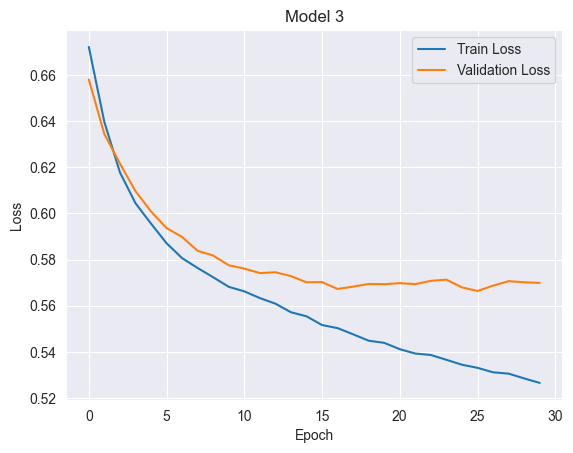

In [651]:
# MODEL FNN 1
# Extract training and validation losses
train_loss = train_model_3.history['loss']
validation_loss = train_model_3.history['val_loss']

# Plot the loss curve
plt.plot(train_loss, label = 'Train Loss')
plt.plot(validation_loss, label = 'Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model 3')
plt.legend()
plt.show()

# Decision Tress

In [652]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [653]:
# Split the data into input features (X) and the target variable (y)
X = clean_data.drop('Diagnosed', axis=1)
y = clean_data['Diagnosed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection: Decision Tree
decision_tree = DecisionTreeClassifier()

In [654]:
# Model Training
decision_tree.fit(X_train, y_train)

# Model Evaluation
y_pred_dt = decision_tree.predict(X_test)
print('Decision Tree Evaluation Results:')
print(classification_report(y_test, y_pred_dt))

Decision Tree Evaluation Results:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       134
           1       0.00      0.00      0.00        12
           2       0.20      0.25      0.22         4
           3       0.50      0.12      0.20         8
           4       0.00      0.00      0.00         1

    accuracy                           0.80       159
   macro avg       0.31      0.26      0.26       159
weighted avg       0.75      0.80      0.77       159



In [655]:
# Hyperparameter Tuning for Decision Tree
param_grid = {'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_dt = grid_search.best_estimator_

In [656]:
# Model Evaluation with Tuned Parameters
y_pred_best_dt = best_dt.predict(X_test)
print('Decision Tree (Tuned) Evaluation Results:')
print(classification_report(y_test, y_pred_best_dt))

Decision Tree (Tuned) Evaluation Results:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       134
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         4
           3       1.00      0.12      0.22         8
           4       0.00      0.00      0.00         1

    accuracy                           0.84       159
   macro avg       0.37      0.22      0.23       159
weighted avg       0.76      0.84      0.78       159



# Random Forest

In [657]:
# Model Selection: Random Forest
random_forest = RandomForestClassifier()

# Model Training
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [658]:
# Model Evaluation
y_pred_rf = random_forest.predict(X_test)
print('Random Forest Evaluation Results:')
print(classification_report(y_test, y_pred_rf))

Random Forest Evaluation Results:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       134
           1       0.00      0.00      0.00        12
           2       0.50      0.25      0.33         4
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         1

    accuracy                           0.84       159
   macro avg       0.27      0.25      0.25       159
weighted avg       0.73      0.84      0.78       159



In [659]:
# Hyperparameter Tuning for Random Forest
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10, 15]}
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

In [660]:
# Model Evaluation with Tuned Parameters
y_pred_best_rf = best_rf.predict(X_test)
print('Random Forest (Tuned) Evaluation Results:')
print(classification_report(y_test, y_pred_best_rf))

Random Forest (Tuned) Evaluation Results:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       134
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         1

    accuracy                           0.84       159
   macro avg       0.17      0.20      0.18       159
weighted avg       0.71      0.84      0.77       159



# Neural network Daniel

In [661]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [662]:
# Split the dataset into training, validation, and testing sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Print the shapes of the scaled datasets
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_val_scaled shape:", X_val_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (632, 14)
X_val_scaled shape: (79, 14)
X_test_scaled shape: (80, 14)


In [663]:
# Determine the number of unique classes in the target variable
num_classes = len(y.unique())

# Define the neural network model
model_4 = Sequential()
model_4.add(Dense(32, activation='relu', input_dim=X_train_scaled.shape[1]))
model_4.add(Dense(32, activation='relu'))
model_4.add(Dense(num_classes, activation='softmax'))

# Compile the model
from tensorflow import keras
model_4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model_4.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)
loss, accuracy = model_4.evaluate(X_test_scaled, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

3/3 [==============================] - 0s 4ms/step - loss: 0.6837 - accuracy: 0.8375
Test Loss: 0.6837225556373596
Test Accuracy: 0.8374999761581421


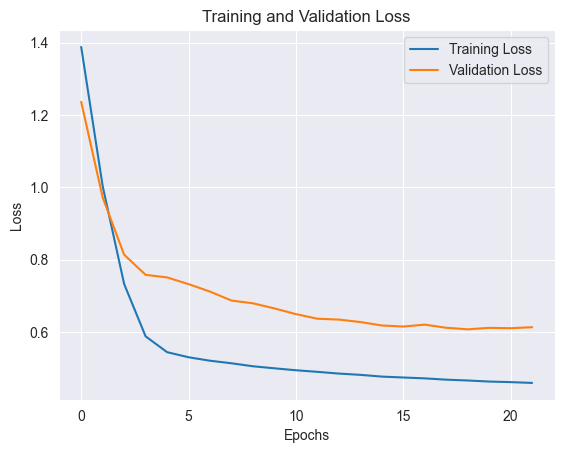

In [664]:
# Plot the training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show() 

In [665]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# Define the function to create the model
def create_model(hidden_units=64, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(hidden_units, activation=activation, input_dim=X_train_scaled.shape[1]))
    model.add(Dense(hidden_units, activation=activation))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [666]:
# Create the KerasClassifier wrapper
from keras.wrappers.scikit_learn import KerasClassifier
model_4 = KerasClassifier(build_fn=create_model, verbose=0)

In [667]:
# Define the hyperparameters to tune
param_grid = {
    'hidden_units': [32, 64, 128],
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'rmsprop']
}

In [668]:
# Perform grid search with cross-validation
from sklearn.model_selection import GridSearchCV
from keras import optimizers
from keras.layers import Dropout
from keras import regularizers
# Perform grid search
grid_search = GridSearchCV(estimator=model_4, param_grid=param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000016B86DBF5D0>,
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_units': [32, 64, 128],
                         'optimizer': ['adam', 'rmsprop']})

In [669]:
# Get the best model
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [670]:
# Evaluate the best model on the testing data
test_accuracy = grid_search.score(X_test_scaled, y_test)
print('Model Evaluation Results:')
print(f'Test Accuracy: {test_accuracy:.4f}')


Model Evaluation Results:
Test Accuracy: 0.8375


In [671]:
# Print the best parameters
print('Best Hyperparameters:')
print(best_params)

Best Hyperparameters:
{'activation': 'relu', 'hidden_units': 64, 'optimizer': 'rmsprop'}


In [672]:
import joblib
joblib.dump(model_3,'CCD.pkl')

['CCD.pkl']